## Important

`run_mafft.sh` and `run_raxml.sh` in each subfoloder of `Trees` to build the trees beforehand.

In [21]:
library(ape)
library(sitePath)
suppressPackageStartupMessages(library(ggtree))

TREES_DIR <- "Trees"
PLOTS_DIR <- "Plots"

H1N1_HA_NAME <- "H1N1_HA"
H3N2_HA_NAME <- "H3N2_HA"
H3N2_HA1_PRE2010_NAME <- "H3N2_HA1_pre2010"
ZIKV_POLYPROTEIN_NAME <- "ZIKV_polyprotein"
SARS_COV_2_CDS_NAME <- "SARS_CoV_2_cds"

H1N1_HA_TREE_DIR <- file.path(TREES_DIR, H1N1_HA_NAME)
H3N2_HA_TREE_DIR <- file.path(TREES_DIR, H3N2_HA_NAME)
H3N2_HA1_PRE2010_TREE_DIR <- file.path(TREES_DIR, H3N2_HA1_PRE2010_NAME)

In [15]:
source("snpTracing.r")

### 1. H1N1

In [33]:
tree <- read.tree(file.path(H1N1_HA_TREE_DIR, "RAxML_bestTree.PROTGAMMAGTR"))
tree <- addMSA(tree, msaPath = file.path(H1N1_HA_TREE_DIR, "aligned.fasta"), msaFormat = "fasta")

pdf(file = file.path(PLOTS_DIR, paste0(H1N1_HA_NAME, ".pdf")), width = 15, height = 50)
plot(ladderize(tree), cex = 0.15)
invisible(dev.off())

### 2. H3N2

In [34]:
tree <- read.tree(file.path(H3N2_HA_TREE_DIR, "RAxML_bestTree.PROTGAMMAGTR"))
tree <- addMSA(tree, msaPath = file.path(H3N2_HA_TREE_DIR, "aligned.fasta"), msaFormat = "fasta")

pdf(file = file.path(PLOTS_DIR, paste0(H3N2_HA_NAME, ".pdf")), width = 15, height = 50)
plot(ladderize(tree), cex = 0.15)
invisible(dev.off())

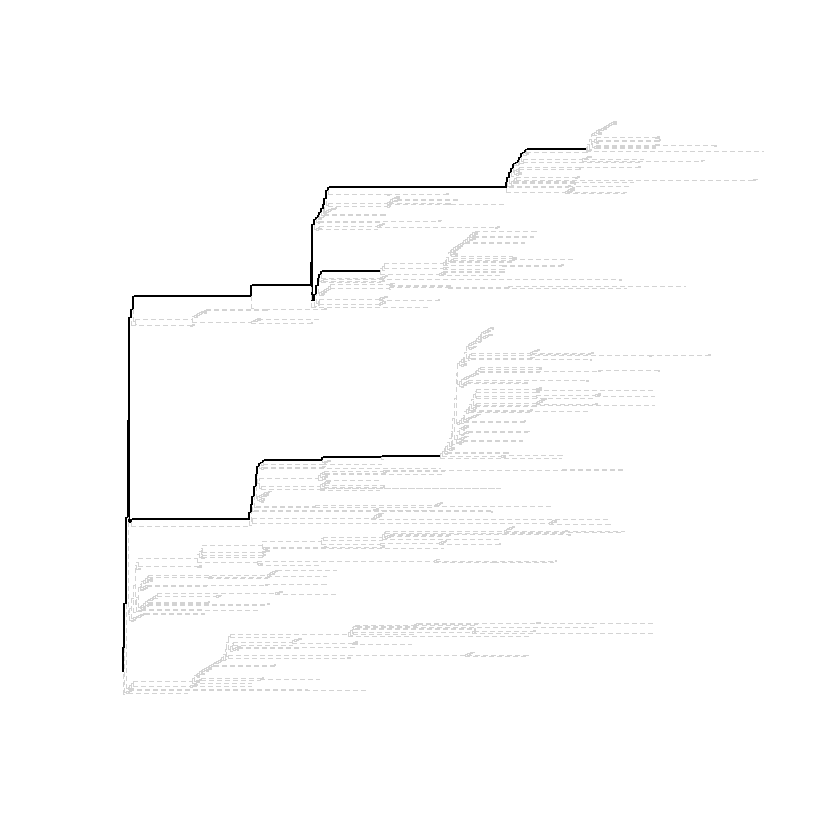

In [3]:
tree <- read.tree(file.path("Trees", "SARS_CoV_2_cds", "RAxML_bestTree.GTRGAMMA"))
tree <- addMSA(tree, msaPath = file.path("Trees", "SARS_CoV_2_cds", "aligned.fasta"), msaFormat = "fasta")

paths <- lineagePath(tree, similarity = 0.03)
plot(paths)

In [4]:
mutations <- fixationlineages(paths, method = "insert")

In [5]:
res <- .snpTracing(mutations, paths)

In [7]:
# groupingSNP <- lapply(groupByPath, function (gp) {
#     # Prep for growing the tree
#     # Define the first node and the first tip cluster
#     newParentNode <- length(gp) + 1L # Keep track of the newly added internal nodes
#     tipNode <- 1L
#     currentTips <- gp[[tipNode]]
#     attr(currentTips, "snpSites") <- character()
#     tipClusters <- list(currentTips) # The existing tips in the tree
#     refSites <- attr(currentTips, "site")
    
#     # Define the first edge of the tree
#     parentNodes <- newParentNode
#     childrenNodes <- tipNode
#     edgeSNPs <- list(character())
#     # A list to record the fixation sites of the parent nodes
#     parentNodesSites <- list()
#     parentNodesSites[[as.character(newParentNode)]] <- refSites
    
#     # Grow the tree
#     for (tipNode in seq_along(gp)[-1]) {
#         currentTips <- gp[[tipNode]]
#         currentSites <- attr(currentTips, "site")
#         # Attach the tip near the most related tips
#         # Assume the reference tips are the most related (least number of SNP)
#         mostRelatedTipNode <- 1L
#         leastSNPnum <- sum(refSites != currentSites)
#         # Loop through the rest existing tip clusters
#         for (otherTipNode in seq_along(tipClusters)[-1]) {
#             otherSites <- attr(tipClusters[[otherTipNode]], "site")
#             snpNum <- sum(otherSites != currentSites)
#             if (snpNum < leastSNPnum) {
#                 mostRelatedTipNode <- otherTipNode
#                 leastSNPnum <- snpNum
#             }
#         }
#         # Find the direct tree edge to the most related tips
#         edgeIndex <- which(childrenNodes == mostRelatedTipNode)
#         parentNode <- parentNodes[edgeIndex]
#         # Tree growing differs according to the SNP against parent node and edge SNP
#         parentSites <- parentNodesSites[[as.character(parentNode)]]
#         snpSites <- as.character(na.omit(vapply(
#             X = names(parentSites),
#             FUN = function (site) {
#                 ref <- parentSites[site]
#                 snp <- currentSites[site]
#                 if (ref == snp) {
#                     return(NA_character_)
#                 }
#                 return(paste0(ref, site, snp))
#             },
#             FUN.VALUE = character(1)
#         )))
#         edgeSNP <- edgeSNPs[[edgeIndex]]
#         sharedWithEdgeSNP <- intersect(snpSites, edgeSNP)
#         # A new internal node is needed when no SNP overlap 
#         if (length(sharedWithEdgeSNP) != 0) {
#             newParentNode <- newParentNode + 1L
#             # Insert the new internal node to the target edge
#             parentNodes[edgeIndex] <- newParentNode
#             parentNodes <- c(parentNodes, parentNode)
#             childrenNodes <- c(childrenNodes, newParentNode)
#             edgeSNPs <- c(edgeSNPs, list(sharedWithEdgeSNP))
#             # Update the SNP of the directly linked edge to the most related tips
#             edgeSNPs[[edgeIndex]] <- setdiff(edgeSNP, sharedWithEdgeSNP)
#             # Calculate the site for the new internal node
# #             siteToChange <- as.character(regmatches(sharedWithEdgeSNP, regexpr('[0-9]+', sharedWithEdgeSNP)))
#             siteToChange <- substr(sharedWithEdgeSNP, 2, nchar(sharedWithEdgeSNP) - 1)
#             parentSites[siteToChange] <- substr(sharedWithEdgeSNP, nchar(sharedWithEdgeSNP), nchar(sharedWithEdgeSNP))
#             parentNodesSites[[as.character(newParentNode)]] <- parentSites
#             # Update the parent node and edge SNP for the current tip node
#             parentNode <- newParentNode
#             snpSites <- setdiff(snpSites, sharedWithEdgeSNP)
#         }
#         # Add edge
#         parentNodes <- c(parentNodes, parentNode)
#         childrenNodes <- c(childrenNodes, tipNode)
#         # Add edge SNP
#         edgeSNPs <- c(edgeSNPs, list(snpSites))
#         # Add the current tips
#         tipClusters <- c(tipClusters, list(currentTips))
#     }
#     res <- list(
#         "edge" = cbind(parentNodes, childrenNodes),
#         "edge.length" = lengths(edgeSNPs) + 0.05,
#         "Nnode" = length(unique(parentNodes)),
#         "tip.label" = as.character(lengths(gp))
#     )
#     attr(res, "tipClusters") <- tipClusters
#     attr(res, "edgeSNPs") <- edgeSNPs
#     class(res) <- "phylo"
#     return(res)
# })

# for (i in seq_along(paths)) {
#     plot.phylo(groupingSNP[[i]])
#     edgelabels(vapply(attr(groupingSNP[[i]], "edgeSNPs"), paste, collapse = ", ", FUN.VALUE = character(1)))
# }

In [6]:
checkValidPhylo(res)

Starting checking the validity of res...
Found number of tips: n = 15 
Found number of nodes: m = 7 
Done.


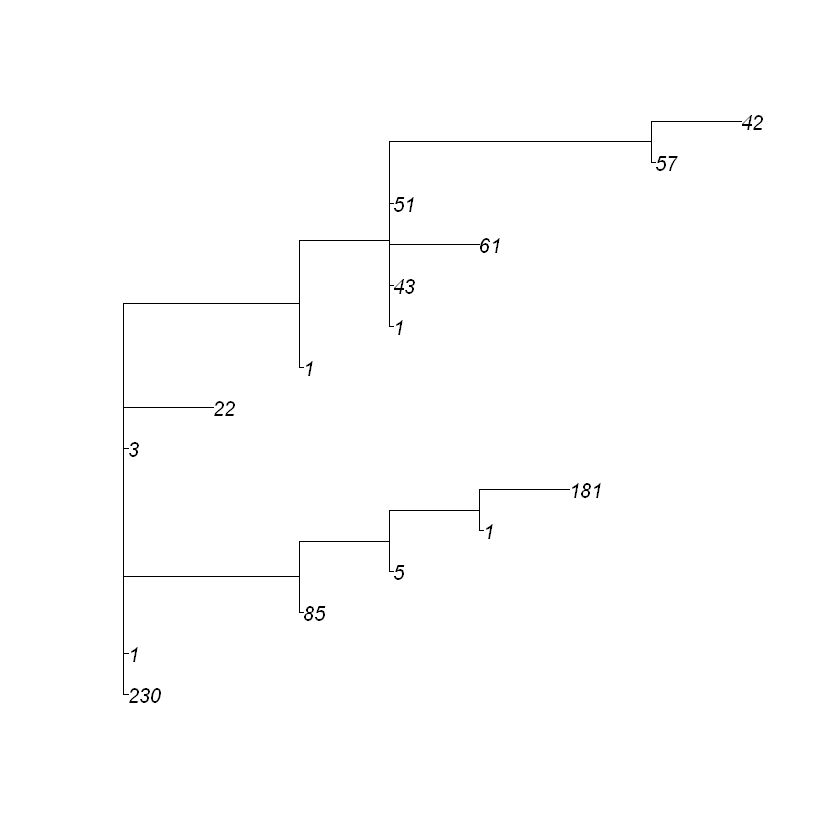

In [12]:
plot(res)

In [9]:
# allMutSites <- unlist(lapply(edgeSNPs, function (sites) {
#     substr(sites, 2, nchar(sites) - 1)
# }))

# duplicatedSites <- unique(allMutSites[which(duplicated(allMutSites))])
edgeSNPs <- attr(res, "edgeSNPs")

allMutSites <- unlist(edgeSNPs)
duplicatedSites <- unique(allMutSites[which(duplicated(allMutSites))])

ERROR: Error in text.default(XX, YY, text, adj = adj, col = col, ...): zero-length 'labels' specified


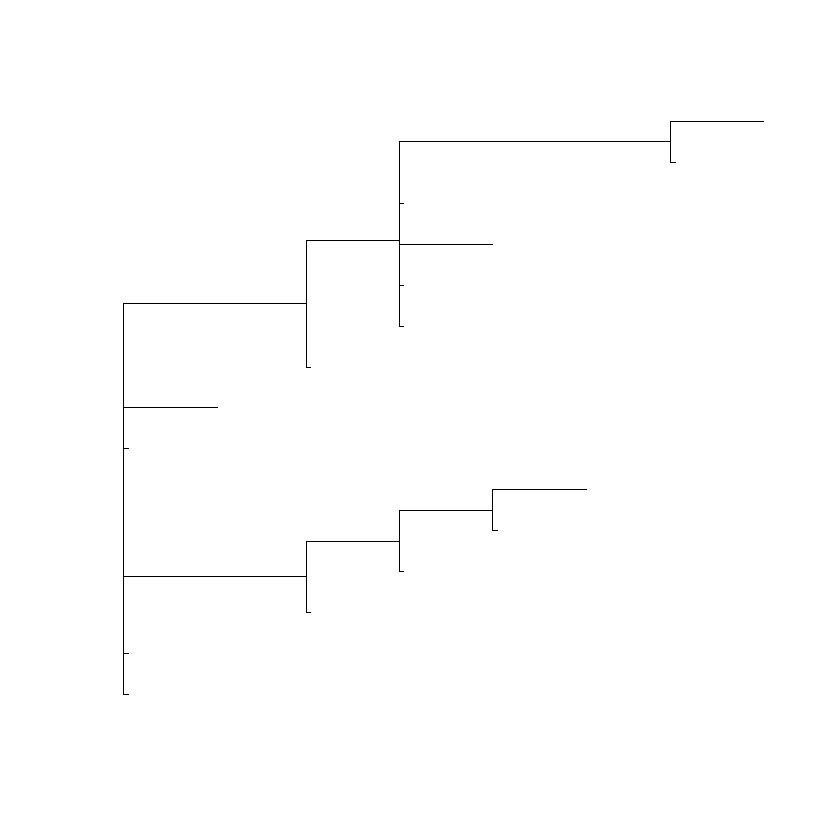

In [10]:
# recurringSites <- lapply(edgeSNPs, function (sites) {
#     s <- substr(sites, 2, nchar(sites) - 1)
#     sites[which(s %in% duplicatedSites)]
# })

recurringSites <- lapply(edgeSNPs, function (sites) {
    sites[which(sites %in% duplicatedSites)]
})
edge2show <- which(lengths(recurringSites) != 0)

plot(res, show.tip.label = FALSE)
# edgelabels(text = vapply(recurringSites[edge2show], paste, collapse = ", ", FUN.VALUE = character(1)), edge = edge2show)

# recurringSites <- lapply(edgeSNPs, function (sites) {
#     sites[which(sites %in% duplicatedSites[[14]])]
# })
# edge2show <- which(lengths(recurringSites) != 0)

# plot(res, show.tip.label = FALSE)
# edgelabels(text = vapply(recurringSites[edge2show], paste, collapse = ", ", FUN.VALUE = character(1)), edge = edge2show)